In [1]:
from wordvector import WordVector
wv = WordVector('skipgram/ckpts/epoch=99-train_mean_loss=4.758869171142578.ckpt')
wv.get_wordvector(0)

array([-1.56822634e+00, -1.02599061e+00, -2.36560717e-01, -7.86222756e-01,
        1.10513914e+00,  6.95185721e-01, -5.43906428e-02, -1.99684918e+00,
        4.70108747e-01, -1.33646846e+00,  2.38906339e-01,  5.28659463e-01,
        1.41458809e-01,  1.24739969e+00,  1.11736488e+00, -2.13015258e-01,
       -1.26756334e+00, -1.50147343e+00,  3.99904251e-01,  6.59185648e-01,
        5.65547287e-01, -1.89455378e+00, -6.11681879e-01,  1.91164887e+00,
        1.01827538e+00, -6.68608725e-01,  1.89153254e-01, -9.41372588e-02,
        1.52521360e+00,  1.45330453e+00,  8.15875411e-01, -9.20859933e-01,
       -1.69597507e-01,  2.57787347e-01, -6.80121243e-01,  5.12681603e-01,
        5.04121006e-01, -2.93819845e-01,  3.89185101e-01,  2.73268491e-01,
        3.01507171e-02,  1.19947278e+00, -4.64251131e-01,  2.18076110e-01,
        6.58559203e-01,  2.05302310e+00, -1.95138788e+00, -1.59214687e+00,
       -8.76465559e-01,  1.23851252e+00,  1.30328012e+00, -4.04680856e-02,
        8.15953035e-03, -

In [7]:
# from sklearn.manifold import TSNE                   # final reduction
from sklearn.decomposition import PCA
import numpy as np                                  # array handling
def reduce_dimensions(vectors,labels,num_dimensions=2):
    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)  # fixed-width numpy strings

    # reduce using t-SNE，一定要指定随机种子，这样每次降维后的结果才能一样
    tsne = PCA(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = np.asarray([v[0] for v in vectors])
    y_vals = np.asarray([v[1] for v in vectors])
    return x_vals, y_vals, labels
def plot_word2vec(x_vals, y_vals, words,is_show=False,is_save="True"):
    import random
    import matplotlib.pyplot as plt
    plt.rcParams["font.sans-serif"] = ["SimHei"]  # 设置字体
    plt.rcParams["axes.unicode_minus"] = False  # 该语句解决图像中的“-”负号的乱码问题

    random.seed(0)

    plt.figure(figsize=(12, 12),dpi=300)
    plt.scatter(x_vals, y_vals)
    indices = list(range(len(words)))

    # 标注文本
    for i in indices:
        plt.text(x_vals[i], y_vals[i],words[i],
                 fontdict={
                            # 'family': '宋体', # 标注文本字体
                            'fontsize': 10, # 文本大小
                            # 'fontweight': 'bold', # 字体粗细
                            # 'fontstyle': 'italic', # 字体风格
                            'color': "black",  # 文本颜色
                     }
                 )
    # Label randomly subsampled 25 data points
    # selected_indices = random.sample(indices, 25)
    # for i in selected_indices:
    #     plt.annotate(words[i], (x_vals[i], y_vals[i]))
    if is_show:
        plt.show()
    if is_save:
        plt.savefig("cluster.png")

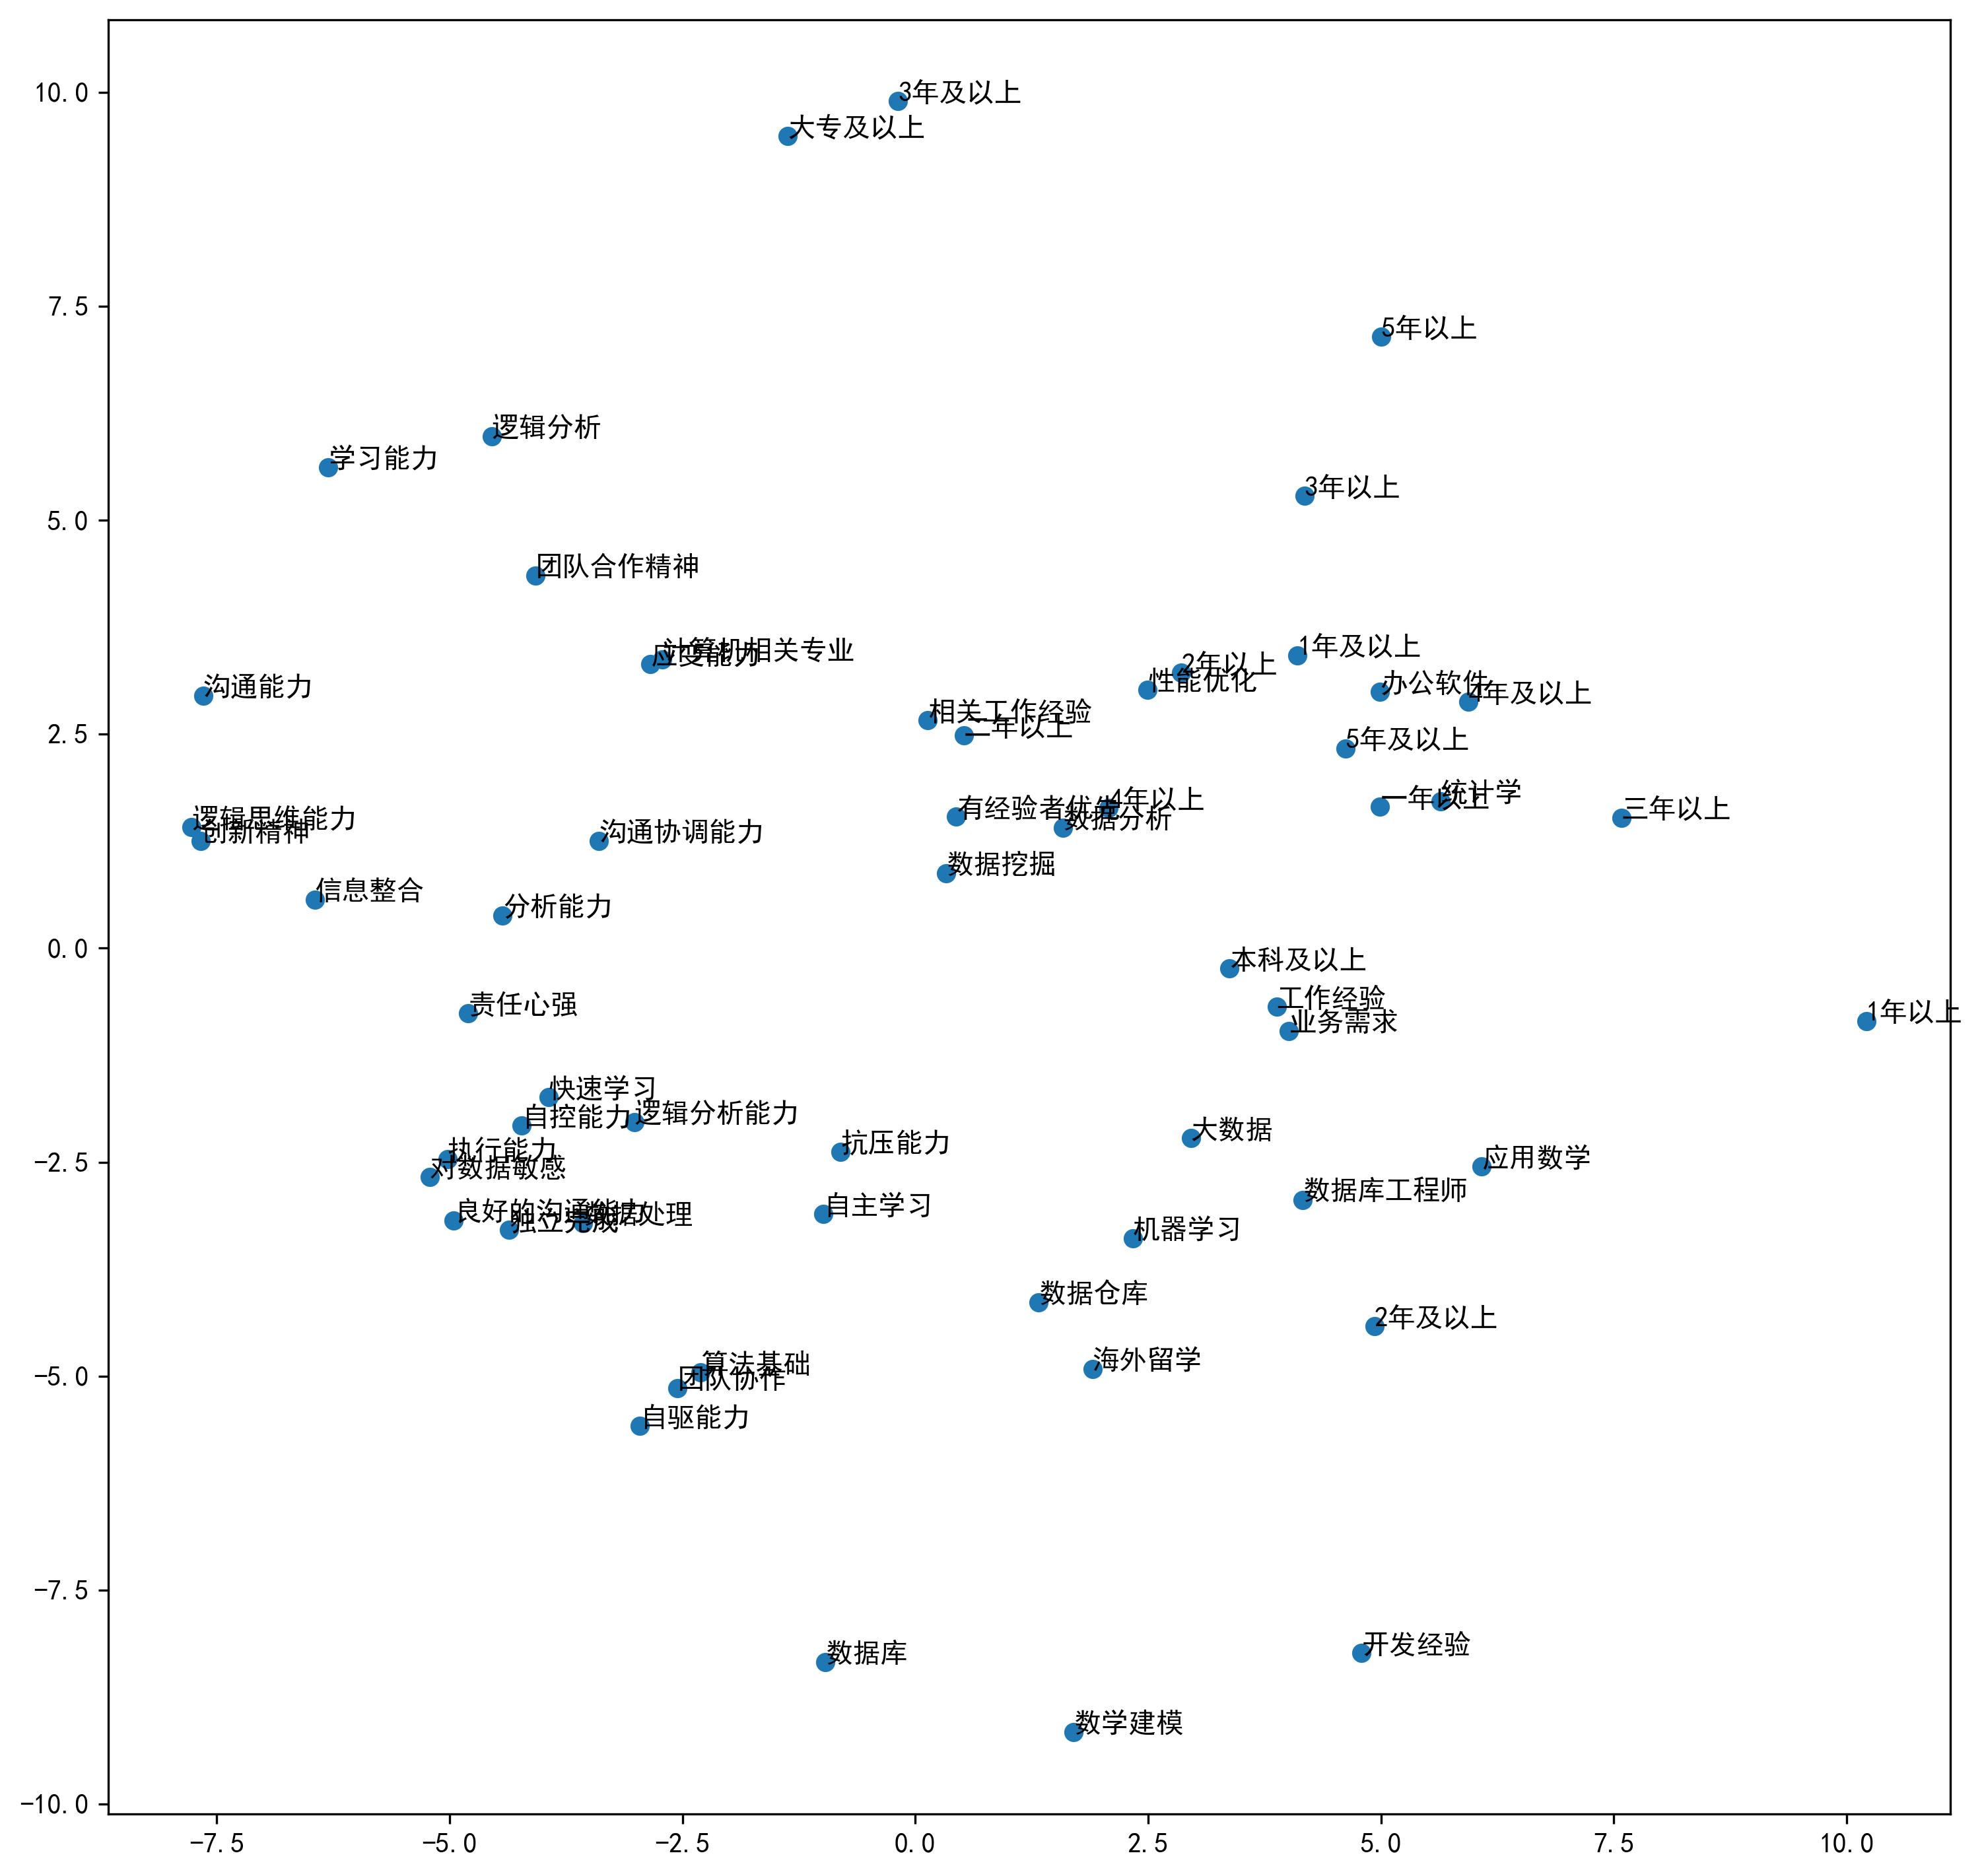

In [8]:
from utils import load_index2word
index2word = load_index2word()
# index_list = list(range(50))
with open('class_words.TXT', 'r', encoding='utf-8') as f:
    index_list = []
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        if line:
            index_list.append(line)
vectors = wv.get_batch_wordvector(index_list)
labels = index_list
x, y, words = reduce_dimensions(vectors, labels,num_dimensions=2)
plot_word2vec(x, y, words)